In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("gurgaon_properties_outliers_treated.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ambience creacions,sector 22,3.20,11498.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0,927.666667
1,flat,m3m woodshire,sector 107,1.80,7624.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0,787.000000
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,465.000000
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0,319.333333
4,flat,imt view society,manesar,0.95,3652.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,867.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1679
built_up_area          1970
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

* The columns "floorNum," "facing," "super_built_up_area," "built_up_area," and "carpet_area" contain missing values.

* The "built_up_area" column contains missing values in more than 50 percent of the data points.

## built_up_area

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='super_built_up_area'>

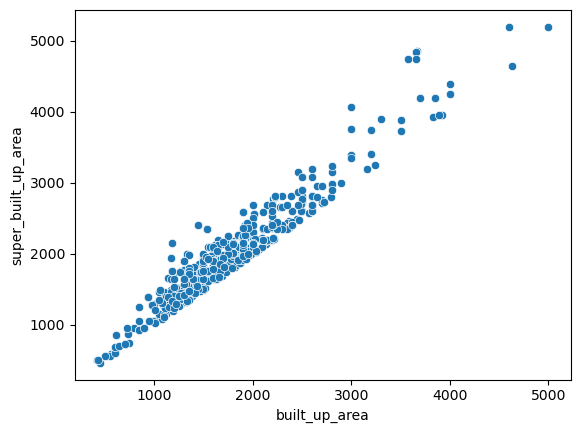

In [6]:
#Check the relationship between the 'built_up_area' and 'super_built_up_area' columns.
sns.scatterplot(df['built_up_area'],df['super_built_up_area'])

* there is strong linear relationship between built_up_area and super_built_up_area columns.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

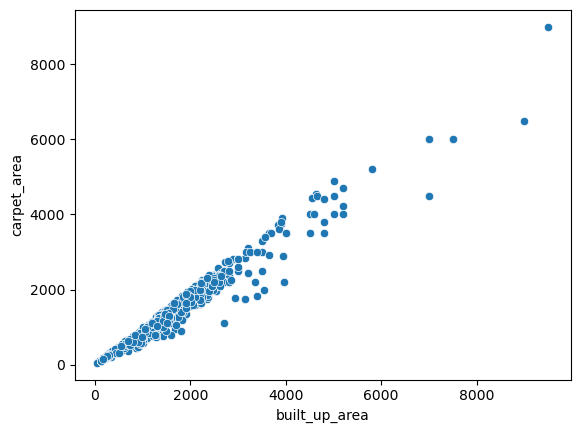

In [7]:
#Check the relationship between the 'built_up_area' and 'carpet_area' columns.
sns.scatterplot(df['built_up_area'],df['carpet_area'])

* there is strong linear relationship between built_up_area and carpet_area.

In [8]:
# Check for common rows with null values in the 'super_built_up_area,' 'built_up_area,' and 'carpet_area' columns.
((df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [9]:
# filtering rows with values available in all three columns.
all_present_df=df[~((df['super_built_up_area'].isnull())|(df['built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [10]:
all_present_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,palam vihar society,sector 2,0.40,8602.0,465.0,Super Built up area 465(43.2 sq.m.)Built Up ar...,1.0,1.0,1,5.0,North,Moderately Old,465.0,450.0,425.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,465.000000
5,flat,la vida by tata housing,sector 113,2.78,11347.0,2450.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,3.0,3,3.0,North,New Property,2690.0,2599.0,2450.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,816.666667
9,flat,dlf regal gardens,sector 90,1.27,5498.0,2310.0,Super Built up area 1755(163.04 sq.m.)Built Up...,3.0,3.0,3+,2.0,South-West,Relatively New,1755.0,1500.0,1400.0,0.0,0.0,0.0,0.0,1.0,1.0,72.0,770.000000
10,flat,ss the leaf,sector 85,1.09,6667.0,1635.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2.0,2.0,3,9.0,South-West,Relatively New,1640.0,1638.0,1635.0,0.0,0.0,1.0,0.0,0.0,1.0,174.0,817.500000
11,flat,adani m2k oyster grande,sector 102,4.55,10000.0,4550.0,Super Built up area 4650(432 sq.m.)Built Up ar...,4.0,4.0,3+,11.0,North-East,Relatively New,4650.0,4630.0,4550.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,1137.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,flat,vatika gurgaon,sector 83,0.78,6265.0,1245.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2.0,2.0,2,3.0,South-East,Relatively New,1245.0,850.0,790.0,1.0,0.0,0.0,1.0,0.0,0.0,165.0,622.500000
3529,flat,shree vardhman flora,sector 90,0.65,6792.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up...,2.0,2.0,3,9.0,South-East,Relatively New,1350.0,1050.0,950.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,478.500000
3542,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.)Built Up...,4.0,5.0,3+,9.0,North-East,Relatively New,2905.0,2800.0,2500.0,0.0,1.0,0.0,0.0,0.0,0.0,165.0,726.250000
3546,flat,vatika lifestyle homes,sector 83,1.04,5699.0,1825.0,Super Built up area 1755(163.04 sq.m.)Built Up...,3.0,2.0,2,2.0,South-West,Moderately Old,1755.0,1500.0,1100.0,0.0,0.0,0.0,0.0,0.0,1.0,95.0,608.333333


In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio=(all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio=(all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio,super_to_built_up_ratio

(0.9, 1.105263157894737)

In [15]:
#filtering rows with null values in 'built_up_area' and values available in both 'carpet_area' and 'super_built_up_area' columns.
sbc_df=df[~(df['super_built_up_area'].isnull())& (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,m3m woodshire,sector 107,1.80,7624.0,2361.0,Super Built up area 2361(219.34 sq.m.)Carpet a...,3.0,4.0,3+,2.0,NaN,Relatively New,2361.0,NaN,1384.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0,787.000000
4,flat,imt view society,manesar,0.95,3652.0,2601.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,3.0,4.0,3,6.0,South-East,Moderately Old,2600.0,NaN,1900.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0,867.000000
19,flat,ashiana anmol,sohna road,0.99,8216.0,1205.0,Super Built up area 1205(111.95 sq.m.)Carpet a...,2.0,2.0,2,6.0,East,Undefined,1205.0,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,602.500000
20,flat,ashok vihar phase 2,sector 3 phase 2,0.28,4308.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2.0,2.0,1,3.0,North,Relatively New,650.0,NaN,550.0,0.0,0.0,0.0,0.0,0.0,1.0,64.0,325.000000
25,flat,ss almeria,sector 84,1.48,7400.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3.0,3.0,2,1.0,South-West,New Property,2000.0,NaN,1294.0,0.0,1.0,1.0,0.0,0.0,0.0,139.0,666.666667


In [18]:
# filling null values rows in built_up_area column using carpet_to_built_up_ratio,super_to_built_up_ratio values.
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_18604\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1679
built_up_area          1549
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

* The number of null values in the 'built_up_area' column is decreasing.

In [21]:
# filtering rows with null values in both 'carpet_area' and 'built_up_area' columns and values available in the 'super_built_up_area' column.
sb_df=df[~(df['super_built_up_area'].isnull())&(df['built_up_area'].isnull())&(df['carpet_area'].isnull())]

In [22]:
sb_df

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ambience creacions,sector 22,3.20,11498.0,2783.0,Super Built up area 2781(258.36 sq.m.),3.0,4.0,3+,2.0,North-East,New Property,2781.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0,927.666667
7,flat,dlf regal gardens,sector 90,1.21,6926.0,1747.0,Super Built up area 1747(162.3 sq.m.),3.0,3.0,3+,29.0,West,Relatively New,1747.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,95.0,582.333333
21,flat,ss the leaf,sector 85,2.30,8179.0,2812.0,Super Built up area 2812(261.24 sq.m.),4.0,4.0,3+,8.0,South,Relatively New,2812.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,21.0,703.000000
22,flat,silverglades hightown residences,sector 43,4.20,19765.0,2125.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,2,7.0,East,Undefined,2150.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,42.0,708.333333
24,flat,ats triumph,sector 104,1.85,8079.0,2290.0,Super Built up area 2290(212.75 sq.m.),3.0,4.0,3+,14.0,East,Relatively New,2290.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,117.0,763.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,flat,eldeco accolade,sohna road,0.73,5753.0,1269.0,Super Built up area 1269(117.89 sq.m.),2.0,2.0,3,9.0,North-East,Relatively New,1269.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,103.0,634.500000
3544,flat,sanskriti apartments,sector 43,2.50,13514.0,1850.0,Super Built up area 1850(171.87 sq.m.),3.0,2.0,3,5.0,East,Old Property,1850.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,616.666667
3547,flat,ireo the corridors,sector 67a,2.00,11429.0,1750.0,Super Built up area 1750(162.58 sq.m.),3.0,3.0,3,12.0,NaN,New Property,1750.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,38.0,583.333333
3549,flat,zara aavaas,sector 104,0.40,7030.0,569.0,Super Built up area 569(52.86 sq.m.),2.0,2.0,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,38.0,284.500000


In [23]:
# filling null values in built_up_area column using 'super_to_built_up_ratio' value.
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\Damodhara\AppData\Local\Temp\ipykernel_18604\1427073287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1679
built_up_area           673
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# filtering rows with null values in both 'super_built_up_area','built_up_area' columns and values available in the carpet_area column.
c_df=df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,smart world gems,sector 89,1.20,12526.0,958.0,Carpet area: 958 (89 sq.m.),3.0,3.0,3,3.0,East,Undefined,NaN,NaN,958.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0,319.333333
6,flat,godrej oasis,sector 88a,1.30,7259.0,1791.0,Carpet area: 1791 (166.39 sq.m.),3.0,3.0,3+,4.0,North-West,Relatively New,NaN,NaN,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,79.0,597.000000
13,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2.0,2.0,1,0.0,NaN,New Property,NaN,NaN,720.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,360.000000
15,flat,emaar imperial gardens,sector 102,1.92,9600.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3.0,3.0,3,12.0,North-East,Relatively New,NaN,NaN,2000.0,1.0,1.0,1.0,1.0,0.0,1.0,95.0,666.666667
23,flat,conscient elevate,sector 59,4.02,17501.0,2297.0,Carpet area: 2295 (213.21 sq.m.),3.0,3.0,1,3.0,NaN,Under Construction,NaN,NaN,2295.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,765.666667


In [28]:
# filling null values in built_up_area column using 'carpet_to_built_up_ratio' value.
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.90),inplace=True)


C:\Users\Damodhara\AppData\Local\Temp\ipykernel_18604\3641318239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.90),inplace=True)


In [29]:
df.update(c_df)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1012
agePossession             0
super_built_up_area    1679
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

* the number of null values in the built up area coulumn is zero.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='price'>

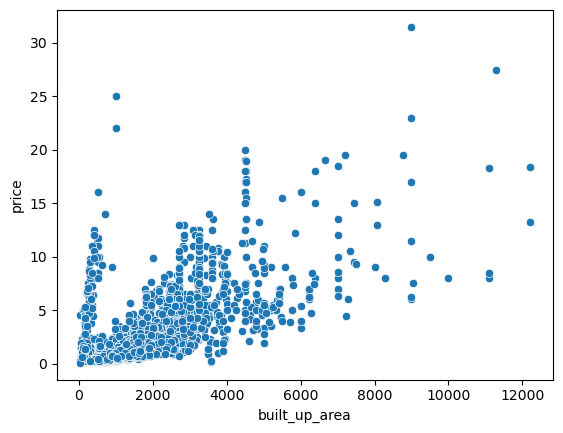

In [31]:
sns.scatterplot(df['built_up_area'],df['price'])

* in above scatterplot price built_up_area increasing price also increases.
* linear relationship between price and built_up_area columns.
* some data points have high prices having low 'built_up_area,' so we need to investigate these points.






In [32]:
#filtering rows builtup area lessthan 2000 and price more than 2.5cr.
anamoly_df=df[(df['built_up_area']<2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
2362,3.60,1836.0,1836.0
244,2.95,1449.0,1000.0
1286,4.50,3240.0,360.0
247,2.80,2350.0,1798.0
3247,6.30,1800.0,1800.0


In [34]:
anamoly_df.shape

(275, 3)

In [35]:
# updating area values into the built_up_area column.
anamoly_df['built_up_area']=anamoly_df['area']

In [36]:
df.update(anamoly_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='price'>

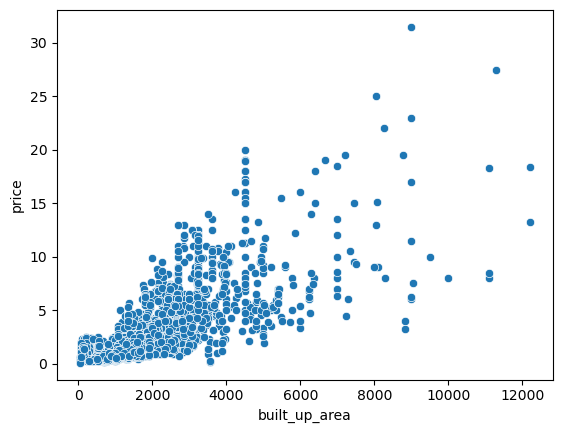

In [37]:
sns.scatterplot(df['built_up_area'],df['price'])

In [38]:
# eliminating unnecessary columns
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [39]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ambience creacions,sector 22,3.20,11498.0,3.0,4.0,3+,2.0,North-East,New Property,2517.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0
1,flat,m3m woodshire,sector 107,1.80,7624.0,3.0,4.0,3+,2.0,NaN,Relatively New,1837.0,0.0,1.0,0.0,0.0,0.0,1.0,129.0
2,flat,palam vihar society,sector 2,0.40,8602.0,1.0,1.0,1,5.0,North,Moderately Old,450.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
3,flat,smart world gems,sector 89,1.20,12526.0,3.0,3.0,3,3.0,East,Undefined,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
4,flat,imt view society,manesar,0.95,3652.0,3.0,4.0,3,6.0,South-East,Moderately Old,2232.0,0.0,1.0,0.0,0.0,0.0,1.0,81.0


In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## floorNum

In [41]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
126,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0
472,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
586,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
747,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
828,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,1.0,59.0
1269,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1593,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,1.0,88.0
1652,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
1689,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1816,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


In [42]:
# filling the null values in floorNum  using median
df[df['property_type']=='house']['floorNum'].median()

2.0

In [43]:
df['floorNum'].fillna(2.0, inplace=True)

In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1012
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## facing

<AxesSubplot:ylabel='facing'>

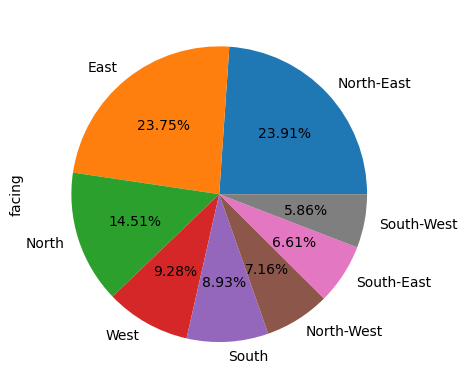

In [46]:
#distribution of facing column 
df['facing'].value_counts().plot(kind='pie',autopct="%0.2f%%")

In [47]:
df.drop(columns=['facing'],inplace=True)

In [48]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2030,flat,spire woods now ananda by alpha corp,sector 103,1.25,6902.0,3.0,4.0,3,11.0,Under Construction,2012.0,1.0,1.0,0.0,0.0,0.0,1.0,105.0
2714,flat,smart world gems,sector 89,0.88,7964.0,2.0,2.0,3,2.0,New Property,1228.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0
1940,house,independent,sector 28,12.00,42194.0,4.0,5.0,3+,4.0,Relatively New,2844.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
1487,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,1.0,159.0
2031,house,independent,sector 4,2.30,17012.0,4.0,4.0,3,2.0,Old Property,160.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
472,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df.drop(index=[472],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## agePossession

In [53]:
df[df['agePossession']=='Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3,flat,smart world gems,sector 89,1.20,12526.0,3.0,3.0,3,3.0,Undefined,1064.0,0.0,0.0,1.0,1.0,0.0,1.0,131.0
14,house,independent,sector 11,4.00,19753.0,5.0,4.0,1,2.0,Undefined,2025.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,flat,unitech heritage city,mehrauli road,4.26,13108.0,4.0,4.0,0,9.0,Undefined,3250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,flat,ashiana anmol,sohna road,0.99,8216.0,2.0,2.0,2,6.0,Undefined,1045.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
22,flat,silverglades hightown residences,sector 43,4.20,19765.0,3.0,4.0,2,7.0,Undefined,2125.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,flat,godrej habitat,sector 3,1.20,8310.0,2.0,2.0,3,0.0,Undefined,1307.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0
3499,flat,sare green parc,sector 92,0.75,4820.0,3.0,2.0,2,16.0,Undefined,1556.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3508,flat,m3m capital,sector 113,2.51,14800.0,3.0,3.0,3+,2.0,Undefined,1696.0,1.0,0.0,0.0,0.0,0.0,1.0,49.0
3534,house,independent,sector 1,1.85,16003.0,4.0,3.0,2,3.0,Undefined,1284.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
#filling undefined rows in agePossession columns based on the 'sector' and 'property_type' columns
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [56]:
df['agePossession'].value_counts()

Relatively New        1782
New Property           635
Moderately Old         585
Old Property           330
Under Construction     125
Undefined               97
Name: agePossession, dtype: int64

In [57]:
#filling undefined rows in agePossession columns based on the 'sector' column.
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [59]:
df['agePossession'].value_counts()

Relatively New        1800
New Property           661
Moderately Old         592
Old Property           338
Under Construction     125
Undefined               38
Name: agePossession, dtype: int64

In [60]:
#filling undefined rows in agePossession columns based on the 'property_type' column.
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [62]:
df['agePossession'].value_counts()

Relatively New        1815
New Property           661
Moderately Old         615
Old Property           338
Under Construction     125
Name: agePossession, dtype: int64

* All undefined rows in the 'agePossession' column have been filled

In [63]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)
df.shape

(3554, 18)